# 1D Nonlinear Convection (Inviscid Burgers Equation)

Here, we a nonlinearity to the linear convection equation as follows:
$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
$$

Same Initial conditions et al... We arrive at:
$$
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} 
+ u^{n}_{i}
\frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta x}
= 0
$$

and
$$
u^{n+1}_{i} 
= 
u^{n}_{i} 
- u^{n}_{i} \frac{\Delta t}{\Delta x} \left( u^{n}_{i} - u^{n}_{i-1} \right)
$$

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Spatial domain (n units of length).
L = 2.0
# Number of spatial grid points.
nx = 81
dx = L / (nx -1)

# Number of time steps.
nt = 51
dt = 0.01

# Initial conditions - u = 2, 0.5 < x < 1; u = 1 elsewhere.
# Boundary condition - [0,2]
u = np.ones(nx)
u[int(0.5 / dx): int(1/dx+1)] = 2

In [41]:
# Initialize tmp array - soltn for the nex time step.
# Same dimentions as array u.
un = np.ones(nx)

for n in range(nt):
    # cp existing values of u in un.
    # un will hold the values at timestep n, u at n+1.
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - un[i]*(dt/dx)*(un[i] - un[i-1])

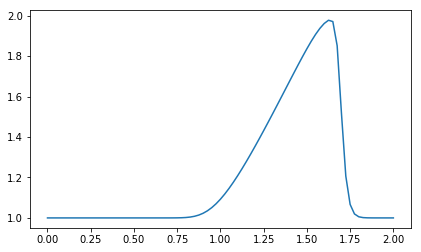

In [42]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(121)

ax.plot(np.linspace(0, 2, nx), u)
plt.show()

# Animation

In [43]:
from matplotlib import animation, rc
from IPython.display import HTML

### PARAMETERS
L = 2.0
nx = 81
dx = L / (nx -1)
nt = 85
dt = 0.01

u = np.ones(nx)
u[int(0.5 / dx): int(1/dx+1)] = 2
un = np.ones(nx)

def animate(n):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - un[i] *(dt/dx)*(un[i] - un[i-1])

    line.set_data(np.linspace(0, 2, nx), u)
    return (line,)

fig, ax = plt.subplots()
ax.set_xlim((0, 2))
ax.set_ylim((0, 2.5))
line, = ax.plot([], [], lw=2)


anim = animation.FuncAnimation(fig, animate, frames=nt, blit=True)
plt.close()
HTML(anim.to_html5_video())